In [1]:
import json_tricks
answer = {}



# Gradient descent:

Here is a theory:
- Gradient of the loss function over the weights $\nabla_{\mathbf x} L$ points to the direction of the fastest ascend.
- Thus, we need to perfrom steps in the opposite direction
- Here is the Gradient Descent Algorithm:
$\mathbf w^{t+1} = \mathbf w^{t} - \alpha \nabla_{\mathbf w} L$

# Finding gradient with Torch

Torch knows, how to calculate derivative of some value over all the tensors that were used to produce it.
To do so, we have to calculate this value (usually it is loss function), and after that we have to call its `backward` method.

Here is how it is done:
```python
x = torch.tensor(10, requires_grad=True)
y = torch.tensor(5, requires_grad=True)
loss = x + y
loss.backward()

print(x.grad)
print(y.grad)
```

The output should be 1 and 1 because if $L = x + y$, then $\partial_x L = 1$ and $\partial_y L = 1$

`requires_grad` parameter indicates that for this value it is necessary to calculate gradient (that probably is obvious, but still important).

Note that before you perform backpropagation, the gradient is equal to `None` indicating that it is not initialized and cannot be used.

In [ ]:
import torch

x = torch.tensor(10.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
loss = x + y
print(loss)
loss.backward()
answer['x_grad'] = x.grad.item()
answer['y_grad'] = y.grad.item()
print(x.grad)
print(y.grad)


tensor(15., grad_fn=<AddBackward0>)
tensor(1.)
tensor(1.)


# Something more sophisticated

In the next task we will calculate something slightly more sophisticated. We will calculate gradient for the value

$f(X) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

Our task is to find

$\partial_X f(X)$

Theoretically it is equal to:

$\partial_{x_{kl}} f(X) = \Big( 10\cdot\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' = 10 \cdot\Big(\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}\Big(x_{ij}^2\Big)_{x_{kl}}' $

$ \quad = 10 \cdot\sum\limits_{i, j}2 x_{ij} \big(x_{ij}\big)_{x_{kl}}' $


$ \quad = 10 \cdot 2 x_{kl} \cdot 1 = 20 x_{kl} $

Hence, the theoretical derivative is:

$f(X) = 10\cdot\sum\limits_{i, j}x_{ij}^2$

$\partial_X f(X) = 20 X $

Let us try to calculate the result using Torch:

In [ ]:
import torch

X = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

f_x = 10 * torch.sum(X**2)
f_x.backward()




answer['X_grad'] = X.grad.clone().numpy()
print(X.grad, '<- gradient')

NameError: name 'answer' is not defined

# Function order

In Torch you may visualize, in which order the functions are there in the graph, example is below

In [9]:
print(f_x.grad_fn)
print(f_x.grad_fn.next_functions[0][0])
print(f_x.grad_fn.next_functions[0][0].next_functions[0][0])
print(f_x.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])

# Some visualization functions

This function will be useful to see the contours of the function

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

# Programming the Gradient Descent

We will start with optimizing a simple function:

$f(x, y) = 10 (x^2 + y^2)$

It is a good function to start with as it has minimum at point $(0, 0)$. We should see convergence towards that point

## The Task
- code the function `function_parabola` that calculates the objective function.
- code the gradient descent step with $\alpha = 0.001$. For that:
    - calculate the objective function value
    - perform backporpagation
    - perform a correct update of `X.data`
    - zero the gradient of `X` using `X.grad.zero_()`

In [ ]:
import torch
import numpy as np

def function_parabola(X):
    res = 0
    res = 10 * torch.sum(X**2)
    return res

def function_parabola_np(X):
    return 10 * np.sum(X**2)

def make_gradient_step(function, X):
    alpha = 0.001
    objective_value = function(X)
    objective_value.backward()
    X.data = X.data - alpha * X.grad
    X.grad.zero_()


x = torch.tensor([8.0, 8.0], requires_grad=True)
var_history = []
fn_history = []

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

answer['var_history_1'] = var_history
answer['fn_history_1'] = fn_history

# Some visualizations

IndexError: index 1 is out of bounds for axis 1 with size 1

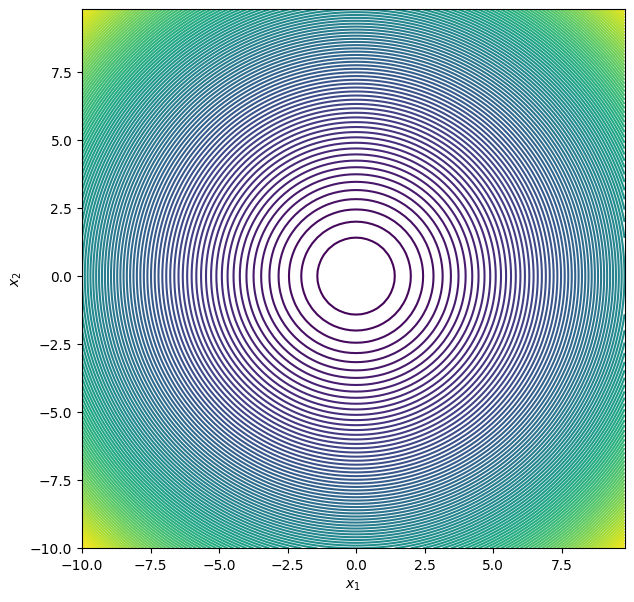

In [36]:
show_contours(function_parabola_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

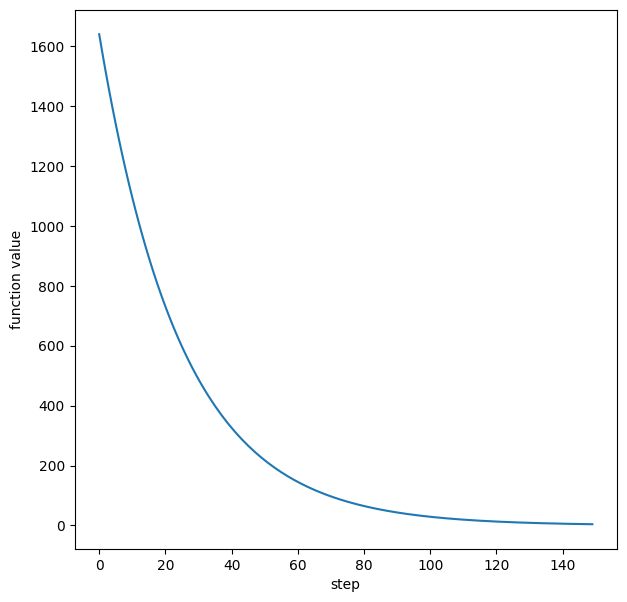

In [37]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

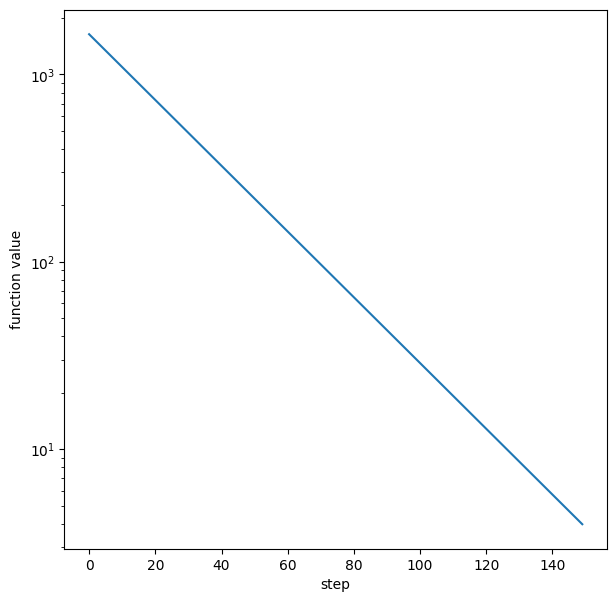

In [38]:
plt.figure(figsize=(7,7))
plt.semilogy(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

# Optimizing a slightly more sophisticated function

Below is another function `function_skewed`. Perform its optimization using the Gradient Descend that you have coded above.

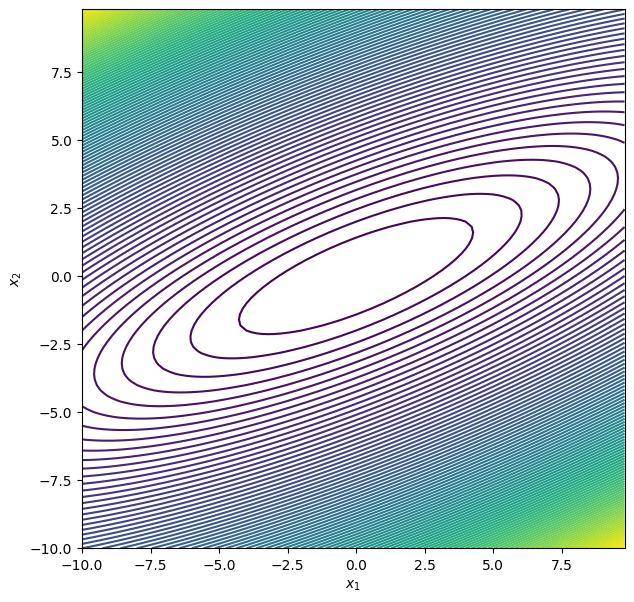

In [46]:
def function_skewed(variable):
    gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
    return res


def function_skewed_np(variable):
    gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.transpose(1, 0) @ (gramma @ variable)).sum()
    return res

show_contours(function_skewed_np)

In [47]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_skewed(x).data.cpu().numpy().copy())
    make_gradient_step(function_skewed, x)

answer['var_history_2'] = var_history
answer['fn_history_2'] = fn_history

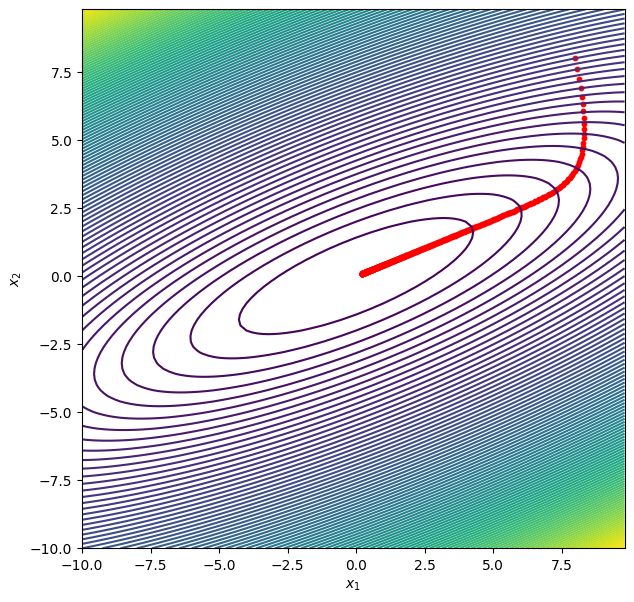

In [42]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

# How to use this

Now you can find minimum of rather sophisticated functions

# Torch Optim

Torch has Optim package that contains a lot of interesting optimizers. The most widely used ones are:
- SGD
- AdamW

We will study the differences between the optimizers a bit later, nevertheless, you can use them both to the functions above

Below your task is to: 
- create an optimizer `SGD` with learning rate 0.001. This optimizer should optimize variable `x`
- optimize the function `function_skewed` with it with the following steps:
    1. zero the optimizer's gradients (in case you do not do that, the gradients will accumulate)
    2. calculate function value
    2. bacpropagate the gradient
    3. make optimization step



In [56]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimazer = torch.optim.SGD([x], lr=0.001)

for i in range(500):
    optimazer.zero_grad()
    function_result = function_skewed(x)
    function_result.backward()
    optimazer.step()
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_result.data.cpu().numpy().copy())

answer['var_history_3'] = var_history
answer['fn_history_3'] = fn_history

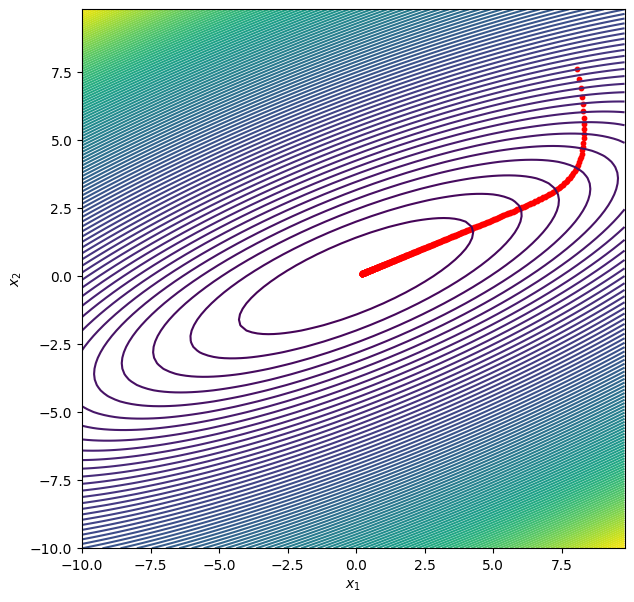

In [57]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

Lastly, here you should create `AdamW` optimizer with learning rate `1`.
Perform the same steps in the optimization cycle

In [52]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimazer = torch.optim.AdamW([x], lr=1)

for i in range(500):
    optimazer.zero_grad()
    function_result = function_skewed(x)
    function_result.backward()
    optimazer.step()
    print("step", i, "value", function_result.data.cpu().numpy())
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_result.data.cpu().numpy().copy())

answer['var_history_4'] = var_history
answer['fn_history_4'] = fn_history


step 0 value 1280.0
step 1 value 880.0
step 2 value 641.7073
step 3 value 531.6499
step 4 value 485.72815
step 5 value 459.56985
step 6 value 432.739
step 7 value 395.14484
step 8 value 343.9392
step 9 value 282.29907
step 10 value 217.13864
step 11 value 156.382
step 12 value 106.62088
step 13 value 71.539246
step 14 value 51.26248
step 15 value 42.71217
step 16 value 40.8751
step 17 value 40.574364
step 18 value 38.081547
step 19 value 31.989124
step 20 value 23.144186
step 21 value 13.846087
step 22 value 6.7140713
step 23 value 3.6348128
step 24 value 5.103423
step 25 value 10.130692
step 26 value 16.70634
step 27 value 22.60537
step 28 value 26.19065
step 29 value 26.89051
step 30 value 25.207102
step 31 value 22.327278
step 32 value 19.54937
step 33 value 17.767912
step 34 value 17.198147
step 35 value 17.411057
step 36 value 17.624598
step 37 value 17.101093
step 38 value 15.471883
step 39 value 12.861965
step 40 value 9.788884
step 41 value 6.9091983
step 42 value 4.739372
step

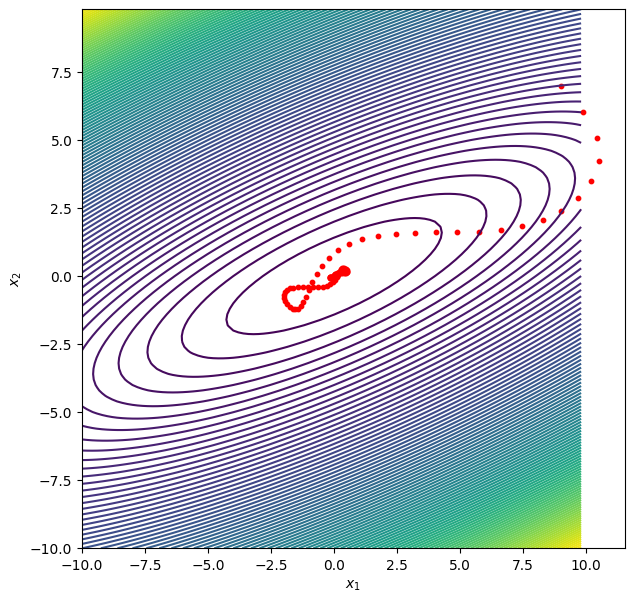

In [53]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

# Other optimizers

There are other optimizers in Torch Optim package, but they are almost never used. 

You even can code your own optimizer if you dare.

Nevertheless, the most widely used optimizer and kind of a default choice for any network is Adam.

# Conclusion

Now you know how to do optimization with Torch package

In [17]:
json_tricks.dump(answer, open('.answer.json', 'w'))